# Top 250 Chains

First, we import some nice libraries.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.manifold import MDS
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

sns.set_theme(style = 'darkgrid', rc={'figure.figsize':(16,11)}, font_scale=1.5, palette = 'Set2')

Then, we load the dataset.

In [2]:
data = pd.read_csv('Top250.csv')
data.head()

,Rank,Restaurant,Content,Sales,YOY_Sales,Units,YOY_Units,Headquarters,Segment_Category
0,1,McDonald's,NaN,40412,4.9%,13846,-0.5%,NaN,Quick Service & Burger
1,2,Starbucks,NaN,21380,8.6%,15049,3.0%,NaN,Quick Service & Coffee Cafe
2,3,Chick-fil-A,While Popeyes got a lot of the chicken buzz in...,11320,13.0%,2470,5.0%,NaN,Quick Service & Chicken
3,4,Taco Bell,NaN,11293,9.0%,6766,2.7%,NaN,Quick Service & Mexican
4,5,Burger King,NaN,10204,2.7%,7346,0.2%,NaN,Quick Service & Burger


In [3]:
data.shape

(250, 9)

We drop those columns that (so far) seem to be unnecessary.

In [4]:
data.drop(['Restaurant', 'Content', 'Headquarters'], axis = 1, inplace = True)
data.head()

,Rank,Sales,YOY_Sales,Units,YOY_Units,Segment_Category
0,1,40412,4.9%,13846,-0.5%,Quick Service & Burger
1,2,21380,8.6%,15049,3.0%,Quick Service & Coffee Cafe
2,3,11320,13.0%,2470,5.0%,Quick Service & Chicken
3,4,11293,9.0%,6766,2.7%,Quick Service & Mexican
4,5,10204,2.7%,7346,0.2%,Quick Service & Burger


Check for dtypes.

In [5]:
data.dtypes

Rank                 int64
Sales                int64
YOY_Sales           object
Units                int64
YOY_Units           object
Segment_Category    object
dtype: object

In [6]:
data['YOY_Sales'] = data['YOY_Sales'].str.replace('%', '')
data['YOY_Units'] = data['YOY_Units'].str.replace('%', '')

In [7]:
data['YOY_Sales'] = data['YOY_Sales'].astype('float')
data['YOY_Units'] = data['YOY_Units'].astype('float')

In [8]:
data.dtypes

Rank                  int64
Sales                 int64
YOY_Sales           float64
Units                 int64
YOY_Units           float64
Segment_Category     object
dtype: object

Everything looks fine. So, we continue.

In [9]:
data_cat = data.select_dtypes(include = 'object')
data_cat.head()

,Segment_Category
0,Quick Service & Burger
1,Quick Service & Coffee Cafe
2,Quick Service & Chicken
3,Quick Service & Mexican
4,Quick Service & Burger


In the following cells, we will create new attributes based upon Segment Category.

In [10]:
data['Segment_Category'] = data['Segment_Category'].str.replace('Asian/Noodle', 'Asian')

In [11]:
len(data['Segment_Category'].unique())

47

In [12]:
data['Quick_Service'] = 0
for i in range(data.shape[0]):
    if ('quick service' in data.loc[i, 'Segment_Category'].lower()) or ('fast' in data.loc[i, 'Segment_Category'].lower()):
        data.loc[i, 'Quick_Service'] = 'Yes'
    else:
        data.loc[i, 'Quick_Service'] = 'No'
data.head()

,Rank,Sales,YOY_Sales,Units,YOY_Units,Segment_Category,Quick_Service
0,1,40412,4.9,13846,-0.5,Quick Service & Burger,Yes
1,2,21380,8.6,15049,3.0,Quick Service & Coffee Cafe,Yes
2,3,11320,13.0,2470,5.0,Quick Service & Chicken,Yes
3,4,11293,9.0,6766,2.7,Quick Service & Mexican,Yes
4,5,10204,2.7,7346,0.2,Quick Service & Burger,Yes


In [13]:
data['Dining'] = 0
for i in range(data.shape[0]):
    if 'dining' in data.loc[i, 'Segment_Category'].lower():
        data.loc[i, 'Dining'] = 'Yes'
    else:
        data.loc[i, 'Dining'] = 'No'
data.head()

,Rank,Sales,YOY_Sales,Units,YOY_Units,Segment_Category,Quick_Service,Dining
0,1,40412,4.9,13846,-0.5,Quick Service & Burger,Yes,No
1,2,21380,8.6,15049,3.0,Quick Service & Coffee Cafe,Yes,No
2,3,11320,13.0,2470,5.0,Quick Service & Chicken,Yes,No
3,4,11293,9.0,6766,2.7,Quick Service & Mexican,Yes,No
4,5,10204,2.7,7346,0.2,Quick Service & Burger,Yes,No


In [14]:
data['Family'] = 0
for i in range(data.shape[0]):
    if 'family' in data.loc[i, 'Segment_Category'].lower():
        data.loc[i, 'Family'] = 'Yes'
    else:
        data.loc[i, 'Family'] = 'No'
data.head()

,Rank,Sales,YOY_Sales,Units,YOY_Units,Segment_Category,Quick_Service,Dining,Family
0,1,40412,4.9,13846,-0.5,Quick Service & Burger,Yes,No,No
1,2,21380,8.6,15049,3.0,Quick Service & Coffee Cafe,Yes,No,No
2,3,11320,13.0,2470,5.0,Quick Service & Chicken,Yes,No,No
3,4,11293,9.0,6766,2.7,Quick Service & Mexican,Yes,No,No
4,5,10204,2.7,7346,0.2,Quick Service & Burger,Yes,No,No


In [15]:
data['Casual'] = 0
for i in range(data.shape[0]):
    if 'casual' in data.loc[i, 'Segment_Category'].lower():
        data.loc[i, 'Casual'] = 'Yes'
    else:
        data.loc[i, 'Casual'] = 'No'
data.head()

,Rank,Sales,YOY_Sales,Units,YOY_Units,Segment_Category,Quick_Service,Dining,Family,Casual
0,1,40412,4.9,13846,-0.5,Quick Service & Burger,Yes,No,No,No
1,2,21380,8.6,15049,3.0,Quick Service & Coffee Cafe,Yes,No,No,No
2,3,11320,13.0,2470,5.0,Quick Service & Chicken,Yes,No,No,No
3,4,11293,9.0,6766,2.7,Quick Service & Mexican,Yes,No,No,No
4,5,10204,2.7,7346,0.2,Quick Service & Burger,Yes,No,No,No


<AxesSubplot:ylabel='Quick_Service'>

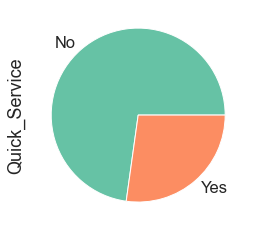

In [16]:
data.Quick_Service.value_counts(normalize = True).plot.pie()

<AxesSubplot:ylabel='Dining'>

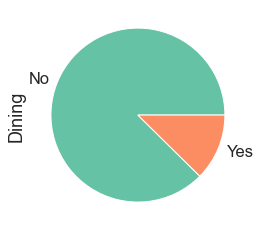

In [17]:
data.Dining.value_counts(normalize = True).plot.pie()

<AxesSubplot:ylabel='Family'>

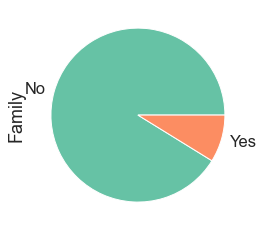

In [18]:
data.Family.value_counts(normalize = True).plot.pie()

<AxesSubplot:ylabel='Casual'>

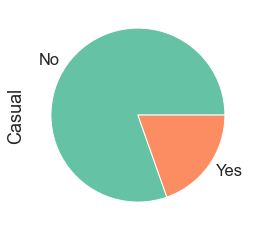

In [19]:
data.Casual.value_counts(normalize = True).plot.pie()

In [20]:
data.drop(['Segment_Category'], axis = 1, inplace = True)
data.head()

,Rank,Sales,YOY_Sales,Units,YOY_Units,Quick_Service,Dining,Family,Casual
0,1,40412,4.9,13846,-0.5,Yes,No,No,No
1,2,21380,8.6,15049,3.0,Yes,No,No,No
2,3,11320,13.0,2470,5.0,Yes,No,No,No
3,4,11293,9.0,6766,2.7,Yes,No,No,No
4,5,10204,2.7,7346,0.2,Yes,No,No,No


Now, we create the class attribute.

In [21]:
cluster_labels = KMeans(n_clusters=2, random_state=0).fit_predict(pd.get_dummies(data))

In [22]:
data['Class'] = cluster_labels

In [23]:
X_train, X_test, y_train, y_test = train_test_split(pd.get_dummies(data.iloc[:, :-1]), 
                                                                   data.iloc[:, -1], 
                                                                   test_size=0.4, random_state = 0)

In [24]:
clf = SVC().fit(X_train, y_train)
clf.score(X_test, y_test) 

1.0

In [25]:
embedding = MDS(n_components=2, random_state = 0)

In [26]:
X_transformed = embedding.fit_transform(pd.get_dummies(data.iloc[:, :-1]))
X_transformed.shape

(250, 2)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


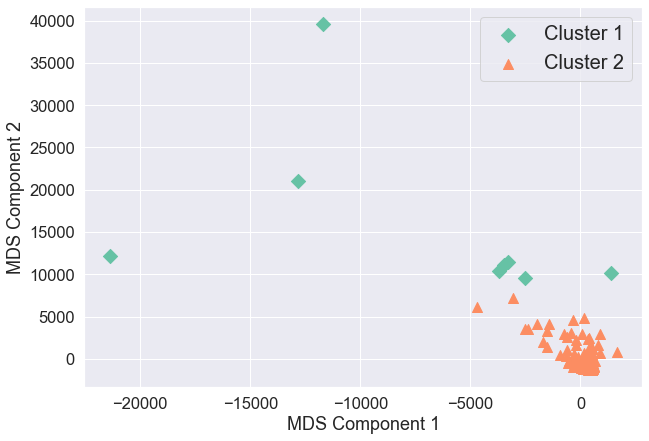

In [27]:
plt.figure(figsize=(10,7))
plt.scatter(X_transformed[:8, 0], X_transformed[:8, 1], marker = 'D', s = 100)
plt.scatter(X_transformed[8:, 0], X_transformed[8:, 1], marker = '^', s = 100)
plt.xlabel('MDS Component 1')
plt.ylabel('MDS Component 2')
plt.legend(['Cluster 1', 'Cluster 2'], prop={'size': 20})
plt.savefig('Clusters250.eps', format = 'eps', bbox_inches = 'tight')

We compute the silhouette score to validate the clusters.

In [28]:
silhouette_avg = silhouette_score(pd.get_dummies(data.iloc[:, :-1]), cluster_labels)
print("For n_clusters =", 2, "The average silhouette_score is :", silhouette_avg)

For n_clusters = 2 The average silhouette_score is : 0.90250212480844


We take the corresponding groups.

In [29]:
mask = (data['Class'] == 1)
group = data[mask]
group.head()

,Rank,Sales,YOY_Sales,Units,YOY_Units,Quick_Service,Dining,Family,Casual,Class
0,1,40412,4.9,13846,-0.5,Yes,No,No,No,1
1,2,21380,8.6,15049,3.0,Yes,No,No,No,1
2,3,11320,13.0,2470,5.0,Yes,No,No,No,1
3,4,11293,9.0,6766,2.7,Yes,No,No,No,1
4,5,10204,2.7,7346,0.2,Yes,No,No,No,1


In [30]:
group.shape

(8, 10)

In [31]:
mask = (data['Class'] == 0)
group2 = data[mask]
group2.head()

,Rank,Sales,YOY_Sales,Units,YOY_Units,Quick_Service,Dining,Family,Casual,Class
8,9,7044,6.9,6126,4.3,Yes,No,No,No,0
9,10,5890,4.0,2160,3.2,Yes,No,No,Yes,0
10,11,5558,0.6,7306,-2.4,Yes,No,No,No,0
11,12,5509,14.8,2584,5.3,Yes,No,No,Yes,0
12,13,4687,4.6,3526,-2.1,Yes,No,No,No,0


In [32]:
group2.shape

(242, 10)

Then, we create a dataset to be used in Weka.

In [33]:
class_ = []
for i in range(data.shape[0]):
    if data.loc[i, 'Class'] == 1:
        class_.append('positive')
    else:
        class_.append('negative')

In [34]:
data['Class'] = class_
data.head()

,Rank,Sales,YOY_Sales,Units,YOY_Units,Quick_Service,Dining,Family,Casual,Class
0,1,40412,4.9,13846,-0.5,Yes,No,No,No,positive
1,2,21380,8.6,15049,3.0,Yes,No,No,No,positive
2,3,11320,13.0,2470,5.0,Yes,No,No,No,positive
3,4,11293,9.0,6766,2.7,Yes,No,No,No,positive
4,5,10204,2.7,7346,0.2,Yes,No,No,No,positive


In [35]:
data.to_csv('data.csv', index = False)

Now, we built the visualizations to support the patterns PBC4cip has found.

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


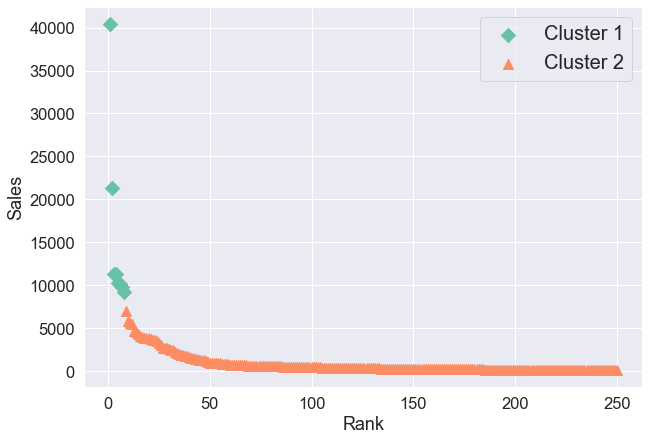

In [36]:
plt.figure(figsize=(10,7))
plt.scatter(group['Rank'], (group['Sales']), marker = 'D', s = 100)
plt.scatter(group2['Rank'], (group2['Sales']), marker = '^', s = 100)
plt.xlabel('Rank')
plt.ylabel('Sales')
plt.legend(['Cluster 1', 'Cluster 2'], prop={'size': 20})
plt.savefig('RankVsSalestop250.eps', format = 'eps', bbox_inches = 'tight')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


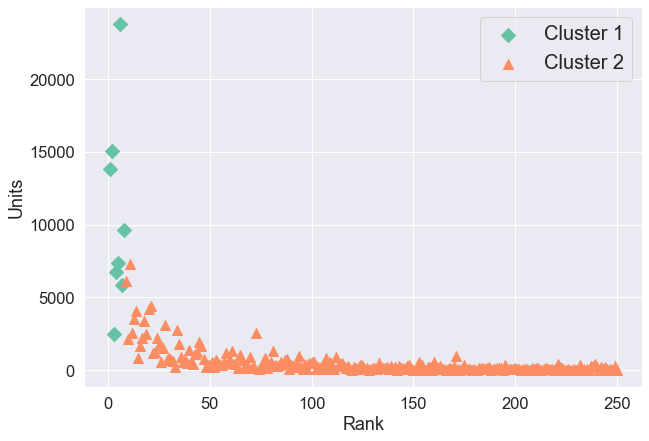

In [37]:
plt.figure(figsize=(10,7))
plt.scatter(group['Rank'], (group['Units']), marker = 'D', s = 100)
plt.scatter(group2['Rank'], (group2['Units']), marker = '^', s = 100)
plt.xlabel('Rank')
plt.ylabel('Units')
plt.legend(['Cluster 1', 'Cluster 2'], prop={'size': 20})
plt.savefig('RankVsUnitstop250.eps', format = 'eps', bbox_inches = 'tight')

That's all folks!